In [1]:
# Mouse wise correlation between VI and CD8 T cell/Parasite
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint
import os
os.chdir("/Users/soumenbera/Documents/killing_Tcells")
data = pd.read_excel('Data_killing_23July2018-curated-final.xlsx') #data path
df = pd.DataFrame(data,columns = ['Time','Background','Tcells','Parasite ID','Intensity', 'Mouse'])
#df["Intensity_scale"] = np.log10(df.Intensity)
#df["Intensity_scale1"] = df.Intensity_scale.fillna(df.Intensity_scale.mean())
df["Time_1"] = df.Time/60.0
df["Intensity_scale"] = df.Intensity.fillna(df.Intensity.mean())
df["Background_scale"] = df.Background.fillna(df.Background.mean())
df["VI_Index"] = np.log10(df["Intensity_scale"]/df["Background_scale"])
#df.loc[(df.Intensity_scale1>np.mean(df.Intensity_scale1))|((df.Intensity_scale1<=np.mean(df.Intensity_scale1)))]
from sklearn import preprocessing
#df["time_scaled"] = preprocessing.scale(df.Time.values)
#print (df)
#print (df['Time from T transfer (min)'], df['Parasite ID']==1)
#df["Intensity_scale2"]=df.Intensity_scale>np.mean(df.Intensity_scale1)
df1 = pd.DataFrame(df,columns = ['Time_1','Intensity_scale','Background_scale','VI_Index', 'Tcells','Mouse'])

0       1
1       1
2       1
3       1
4       1
       ..
2114    3
2115    3
2116    3
2117    3
2118    3
Name: Mouse, Length: 2119, dtype: int64


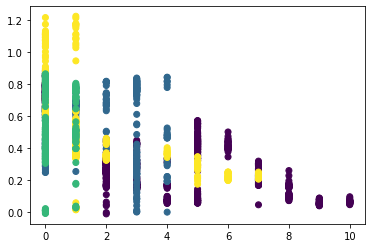

In [2]:
#df1.groupby(['Tcells','Exp [Py()]']).count()['VI_Index'].unstack().plot()
#plt.plot(df1['Tcells'],df1['VI_Index'],'o')
colors = {1:'red', 2:'green', 3:'blue', 4:'yellow'}
print(df['Mouse'])
plt.scatter(df1['Tcells'], df1['VI_Index'], c=df1['Mouse'])

/Users/soumenbera/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


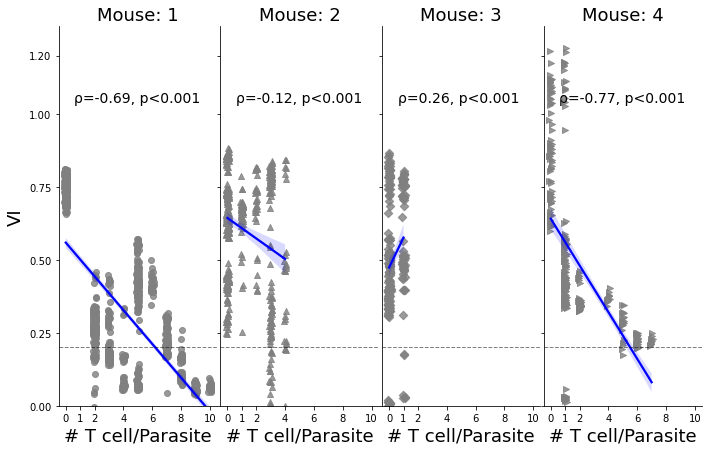

In [5]:
import seaborn as sns
#sns.set_style("white")
#sns.set(font_scale = 1.5)
import scipy as sp
#plt.subplots(figsize=(7,5))
from sklearn import linear_model
regr = linear_model.LinearRegression()
g = sns.lmplot('Tcells', 'VI_Index', data=df1, hue='Mouse',col = 'Mouse',line_kws = {'color': 'blue'},
               markers = ['o','^','D','>'],
               scatter_kws = {'color': 'grey'},height=6, aspect=.4, x_jitter=.1, fit_reg=True)

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data['Tcells'], data['VI_Index'])
    ax = plt.gca()
    ax.text(.1, .8, '\u03C1={:.2f}, p<0.001'.format(r),fontsize=14,
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
#g.set_yticklabels(g.get_yticks(), size = 15)
g = (g.set_axis_labels("# T cell/Parasite", "VI",size=18)
     .set(xlim=(-0.5, 10.5), ylim=(0, 1.3),
          xticks=[0,1,2,4,6,8,10], yticks=[0,0.25,0.5,0.75,1.0,1.2])
     .fig.subplots_adjust(wspace=.02),g.axes[0][0].axhline(y = 0.20, color='black',ls = '--' ,linewidth=1, alpha=.5),
    g.axes[0][1].axhline(y = 0.20, color='black',ls = '--' ,linewidth=1, alpha=.5),
    g.axes[0][2].axhline(y = 0.20, color='black',ls = '--' ,linewidth=1, alpha=.5),
    g.axes[0][3].axhline(y = 0.20, color='black',ls = '--' ,linewidth=1, alpha=.5),
    g.axes[0][1].set_title("Mouse: 2",size=18),
    g.axes[0][0].set_title("Mouse: 1",size=18),
    g.axes[0][2].set_title("Mouse: 3",size=18),
    g.axes[0][3].set_title("Mouse: 4",size=18))
#markers = ['o','^','D','>']

_, ylabels = plt.yticks()
_, xlabels = plt.xticks()
X = df1['Tcells'].values.reshape(-1,1)
Y = df1['VI_Index'].values.reshape(-1,1)
model=regr.fit(X, Y)
xfit = X
yfit = regr.predict(X)
#data_plot = pd.DataFrame({"Year":Year, "Profit":Profit})
#ax.scatter(X, y,color='grey',marker = 'o', s =24)
#sns.lineplot(x = xfit, y=yfit)
#ax.set_xlabel('Tcells',fontsize=24)
#ax.set_ylabel('VI',fontsize=16)
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(title='Mouse', fontsize=16, title_fontsize=20)
plt.savefig('/Users/soumenbera/Documents/regression-VI-mouse-wise.png', format='png', bbox_inches='tight',dpi=300)
plt.show()